testing accuracy : 0.969 


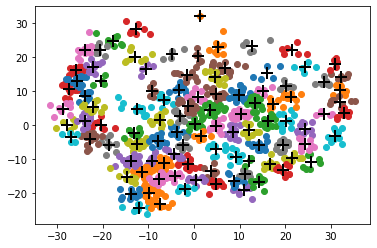

In [10]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def readData(fileName = 'mfeat-pix.txt'):
    """Reads data from a given filename and processes it 
    Args:
        fileName (str, optional): A string that specifies the path to a data file. Defaults to 'mfeat-pix.txt'.
    Returns:
        List: A list of tuples with two items: 
            -Item 0: A list of features (grascale values), 
            -Item 1: The number this list represents
    """    
    # Read data
    inputFile = open(fileName, 'r')
    dataDict = {}
    inputLines = inputFile.readlines()

    # Remove junk at front and start of line and split it into a list
    inputLines = [line.rstrip().lstrip().split('  ') for line in inputLines]

    # Turn list of Strings into a list of Ints
    for i in range(len(inputLines)):
        temp = []
        for j in inputLines[i]:
            temp.append(int(j))
        inputLines[i] = temp

    # Create list of tuples and determine number
    data = []
    for i in range(2000):
        data.append((inputLines[i], int(i/200)))
    return data

def splitData(data):
    """Splits the given data set into a train and test set (seperate features and their respective numbers)
    Args:
        data (List): A data set (in the format as is generated in readData())
    Returns:
        [List]: A list of numpy arrays with the train and test sets
    """
    # Create Empty lists  
    trainFeats = []
    trainNum = []
    testFeats = []
    testNum = []

    # Split data set in train and test set
    for i in range(2000):
        # 0-99 are train, 100-199 are test, etc
        if int(i / 100) % 2:
            testFeats.append(data[i][0])
            testNum.append(data[i][1])
        else:
            trainFeats.append(data[i][0])
            trainNum.append(data[i][1])
    return [np.array(trainFeats), np.array(trainNum), np.array(testFeats), np.array(testNum)]



def Model(data):
  x_train, y_train, x_test, y_test = splitData(data)
  Kmean = KMeans(n_clusters=128)
  Kmean.fit(x_train)
    

   
  Kmean.fit_predict(x_test)
    
  reference_labels = retrieve_info(Kmean.labels_,Kmean.labels_,y_test)
# ‘number_labels’ is a list which denotes the number displayed in image
  numberr_labels = np.random.rand(len(Kmean.labels_))
  for i in range(len(Kmean.labels_)):
 
      numberr_labels[i] = reference_labels[Kmean.labels_[i]]
    
  print('testing accuracy : {} '.format(accuracy_score(numberr_labels, y_test)))

  pca = PCA(2)

  df2 = pca.fit_transform(x_test)
  kmeans = KMeans(n_clusters = 100)
  label = kmeans.fit_predict(df2)
  u_labels = np.unique(label)
  
  for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
    centroidss = kmeans.cluster_centers_
    plt.scatter(centroidss[:, 0], centroidss[:, 1],
        marker='+', s=150, linewidths=0.5,
        color='black', zorder = 10)

  plt.show()

def retrieve_info( y,cluster_labels,y_train):
 
# Initializing
 reference_labels = {}
# For loop to run through each label of cluster label
 for i in range(len(np.unique(y))):
  index = np.where(cluster_labels == i,1,0)
  num = np.bincount(y_train[index==1]).argmax()
  reference_labels[i] = num
 return reference_labels

 print(reference_labels)

def main():
    data = readData()
    Model(data)

if __name__ == "__main__":
    main()
    